In [6]:
import numpy as np
import utils
from keras.models import load_model
from keras import backend as K

from matplotlib import pyplot as plt
from data import Dataset, DataLoader
from model import IMG_WIDTH, IMG_HEIGHT
%matplotlib inline  

model = load_model('../models/2017-10-07-00-00-03.hdf5')
model.summary()
ds = Dataset()
X, y = ds.get_test_data()
gen = DataLoader(X, y, IMG_WIDTH, IMG_HEIGHT)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 180, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 320, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 320, 16)      64        
_________________________________________________________________
elu_1 (ELU)                  (None, 180, 320, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 320, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 180, 320, 16)      64        
_________________________________________________________________
elu_2 (ELU)                  (None, 180, 320, 16)      0         
__________

True: 91.0, Pred [ 13.81733704]


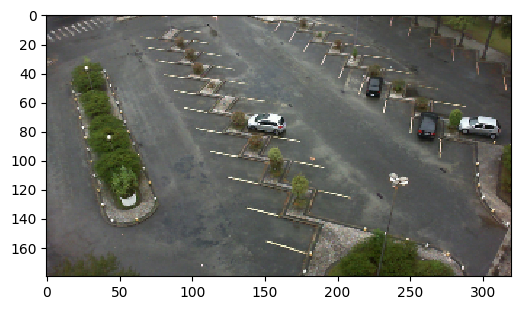

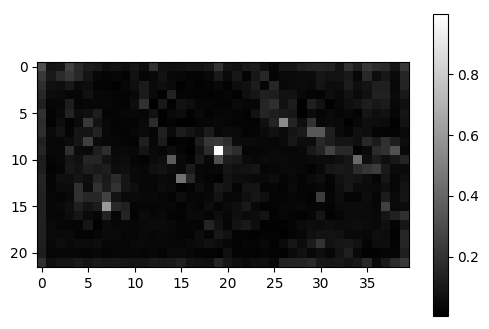

In [8]:
X, y = gen[1]
seed_img = np.expand_dims(X[np.random.randint(0, len(X))], 0)
compute_fn = K.function([model.input, K.learning_phase()], 
                        [model.layers[-2].output, model.output])
mask, pred = compute_fn([seed_img, 0])

print("True: {}, Pred {}".format(y[0], pred[0]))
plt.imshow(utils.decode(seed_img[0]))
plt.show()

plt.imshow(mask[0, ..., 0] / np.max(mask), cmap='gray')
plt.colorbar()
plt.show()